In [1]:
#import necessary library

import pandas as pd
import numpy as np
import random as rnd     

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.pipeline import FeatureUnion,make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

In [2]:
#read the dataset through head method

data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.shape

(8425, 23)

In [5]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
data.RainTomorrow.unique() #WE can see that it is a classification model.


array(['No', 'Yes', nan], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder


In [8]:
LE = LabelEncoder()
data['RainTomorrow'] = LE.fit_transform(data['RainTomorrow']) #we can encode the data for raintomorrow


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [13]:
data.isna().sum() # there are nulls present so we need to fill it

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow        0
dtype: int64

In [14]:
#we can drop few features which will not contribute for prediction

data.drop(['Date'],axis=1,inplace=True) # it has diffrent identities we can drop it
data.drop(['Sunshine'],axis=1,inplace=True) #not focusing on the geographical aspect so we can drop
data.drop(['Evaporation'],axis=1,inplace=True) #it will not contribute much for rainfall
data.drop(['Cloud3pm'],axis=1,inplace=True) 
data.drop(['Cloud9am'],axis=1,inplace=True)
data.drop(['Pressure9am'],axis=1,inplace=True)
data.drop(['Pressure3pm'],axis=1,inplace=True) 
data.drop(['WindDir9am'],axis=1,inplace=True) 
data.drop(['WindSpeed3pm'],axis=1,inplace=True) 



In [23]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Location', 'WindGustDir', 'WindDir3pm'], dtype='object')

In [16]:
LE = LabelEncoder()
data['RainToday'] = LE.fit_transform(data['RainToday']) #encoding for prediction


In [18]:
numerical_column = data.select_dtypes(include=['float64']).columns
numerical_column


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   WindGustDir    7434 non-null   object 
 5   WindGustSpeed  7434 non-null   float64
 6   WindDir3pm     8117 non-null   object 
 7   WindSpeed9am   8349 non-null   float64
 8   Humidity9am    8366 non-null   float64
 9   Humidity3pm    8323 non-null   float64
 10  Temp9am        8369 non-null   float64
 11  Temp3pm        8329 non-null   float64
 12  RainToday      8425 non-null   int32  
 13  RainTomorrow   8425 non-null   int32  
dtypes: float64(9), int32(2), object(3)
memory usage: 855.8+ KB


In [22]:
data.isna().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
WindGustDir      991
WindGustSpeed      0
WindDir3pm       308
WindSpeed9am       0
Humidity9am        0
Humidity3pm        0
Temp9am            0
Temp3pm           96
RainToday          0
RainTomorrow       0
dtype: int64

In [21]:
#imputing the null values using imputer

imp = SimpleImputer(strategy='mean')
data['MinTemp'] = imp.fit_transform(data['MinTemp'].values.reshape(-1, 1) )
data['MaxTemp'] = imp.fit_transform(data['MaxTemp'].values.reshape(-1, 1) )
data['Rainfall'] = imp.fit_transform(data['Rainfall'].values.reshape(-1, 1) )
data['WindGustSpeed'] = imp.fit_transform(data['WindGustSpeed'].values.reshape(-1, 1) )
data['WindSpeed9am'] = imp.fit_transform(data['WindSpeed9am'].values.reshape(-1, 1) )
data['Humidity9am'] = imp.fit_transform(data['Humidity9am'].values.reshape(-1, 1) )
data['Humidity3pm'] = imp.fit_transform(data['Humidity3pm'].values.reshape(-1, 1) )
data['Temp9am'] = imp.fit_transform(data['Temp9am'].values.reshape(-1, 1) )



In [24]:
#filling nulls for object datatype

data.WindGustDir = data.WindGustDir.fillna('none')
data.WindDir3pm = data.WindDir3pm.fillna('none')


In [25]:
imp = SimpleImputer(strategy='mean')
data['Temp3pm'] = imp.fit_transform(data['Temp3pm'].values.reshape(-1, 1) )


In [26]:
data.isna().sum() # we have treated all the nulls

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir3pm       0
WindSpeed9am     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [28]:
#generating dummy values on the data dataset
data= pd.get_dummies(data).astype(int)
data.head()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_none
0,13,22,0,44,20,71,22,16,21,0,...,0,0,0,0,0,0,0,1,0,0
1,7,25,0,44,4,44,25,17,24,0,...,0,0,0,0,0,0,0,0,1,0
2,12,25,0,46,19,38,30,21,23,0,...,0,0,0,0,0,0,0,0,1,0
3,9,28,0,24,11,45,16,18,26,0,...,0,0,0,0,0,0,0,0,0,0
4,17,32,1,41,7,82,33,17,29,0,...,1,0,0,0,0,0,0,0,0,0


In [29]:
data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_none
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,12.754303,23.416261,2.655786,40.153947,13.840000,67.816736,51.246766,17.316083,22.003323,0.293175,...,0.055549,0.088071,0.096499,0.073947,0.043917,0.058635,0.054837,0.057804,0.068843,0.036558
std,5.369706,6.120245,10.250436,13.776215,10.128896,16.774371,18.311914,5.614762,5.945801,0.514031,...,0.229062,0.283415,0.295291,0.261699,0.204922,0.234954,0.227675,0.233387,0.253202,0.187685
min,-2.000000,8.000000,0.000000,7.000000,0.000000,10.000000,6.000000,1.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,19.000000,0.000000,31.000000,6.000000,56.000000,39.000000,13.000000,18.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,23.000000,0.000000,40.000000,13.000000,68.000000,51.000000,17.000000,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,28.000000,1.000000,48.000000,20.000000,80.000000,63.000000,21.000000,26.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,28.000000,45.000000,371.000000,107.000000,63.000000,100.000000,99.000000,39.000000,44.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
cor = data.corr()
cor


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_none
MinTemp,1.000000,0.715524,0.087091,0.229936,0.137061,-0.131286,0.078715,0.885424,0.684356,0.079343,...,-0.030306,-0.009960,0.061521,0.029319,-0.033021,-0.046634,-0.075882,-0.060466,-0.048326,-0.062819
MaxTemp,0.715524,1.000000,-0.084105,0.141082,0.014299,-0.391342,-0.421523,0.863847,0.972164,-0.181125,...,0.031939,-0.087727,0.029202,-0.047903,-0.094558,-0.039017,-0.054805,-0.020089,-0.036573,-0.067608
Rainfall,0.087091,-0.084105,1.000000,0.084733,0.050303,0.222655,0.230032,-0.003600,-0.085163,0.365387,...,-0.004394,0.035730,0.009210,0.001657,0.070266,-0.001970,0.005546,-0.005774,-0.000748,0.011663
WindGustSpeed,0.229936,0.141082,0.084733,1.000000,0.601047,-0.269940,-0.092136,0.201566,0.102499,0.099839,...,0.066470,-0.039106,-0.066508,-0.032957,0.013037,0.025781,0.037010,0.079566,0.038446,-0.041385
WindSpeed9am,0.137061,0.014299,0.050303,0.601047,1.000000,-0.358331,-0.110545,0.109094,-0.003358,0.053766,...,-0.010546,0.043573,-0.114301,0.054845,0.042219,0.023047,0.012813,0.055435,0.021930,-0.156654
Humidity9am,-0.131286,-0.391342,0.222655,-0.269940,-0.358331,1.000000,0.633194,-0.376964,-0.381312,0.322602,...,0.004256,0.027391,0.045342,0.016879,0.053555,-0.060645,-0.031497,-0.039532,-0.059943,0.120222
Humidity3pm,0.078715,-0.421523,0.230032,-0.092136,-0.110545,0.633194,1.000000,-0.130074,-0.490486,0.300558,...,-0.081293,0.063493,0.083738,0.051407,0.087269,-0.016469,-0.058227,-0.107554,-0.050850,0.091565
Temp9am,0.885424,0.863847,-0.003600,0.201566,0.109094,-0.376964,-0.130074,1.000000,0.832429,-0.076203,...,-0.023899,-0.067700,0.066158,-0.018575,-0.064890,-0.024939,-0.059156,-0.047825,-0.033010,-0.082272
Temp3pm,0.684356,0.972164,-0.085163,0.102499,-0.003358,-0.381312,-0.490486,0.832429,1.000000,-0.190752,...,0.030981,-0.098655,0.026524,-0.051501,-0.101737,-0.046026,-0.058712,-0.014082,-0.042101,-0.057233
RainToday,0.079343,-0.181125,0.365387,0.099839,0.053766,0.322602,0.300558,-0.076203,-0.190752,1.000000,...,-0.021379,0.073713,-0.022173,0.033844,0.067082,0.025724,0.023891,-0.006705,0.022764,0.039008


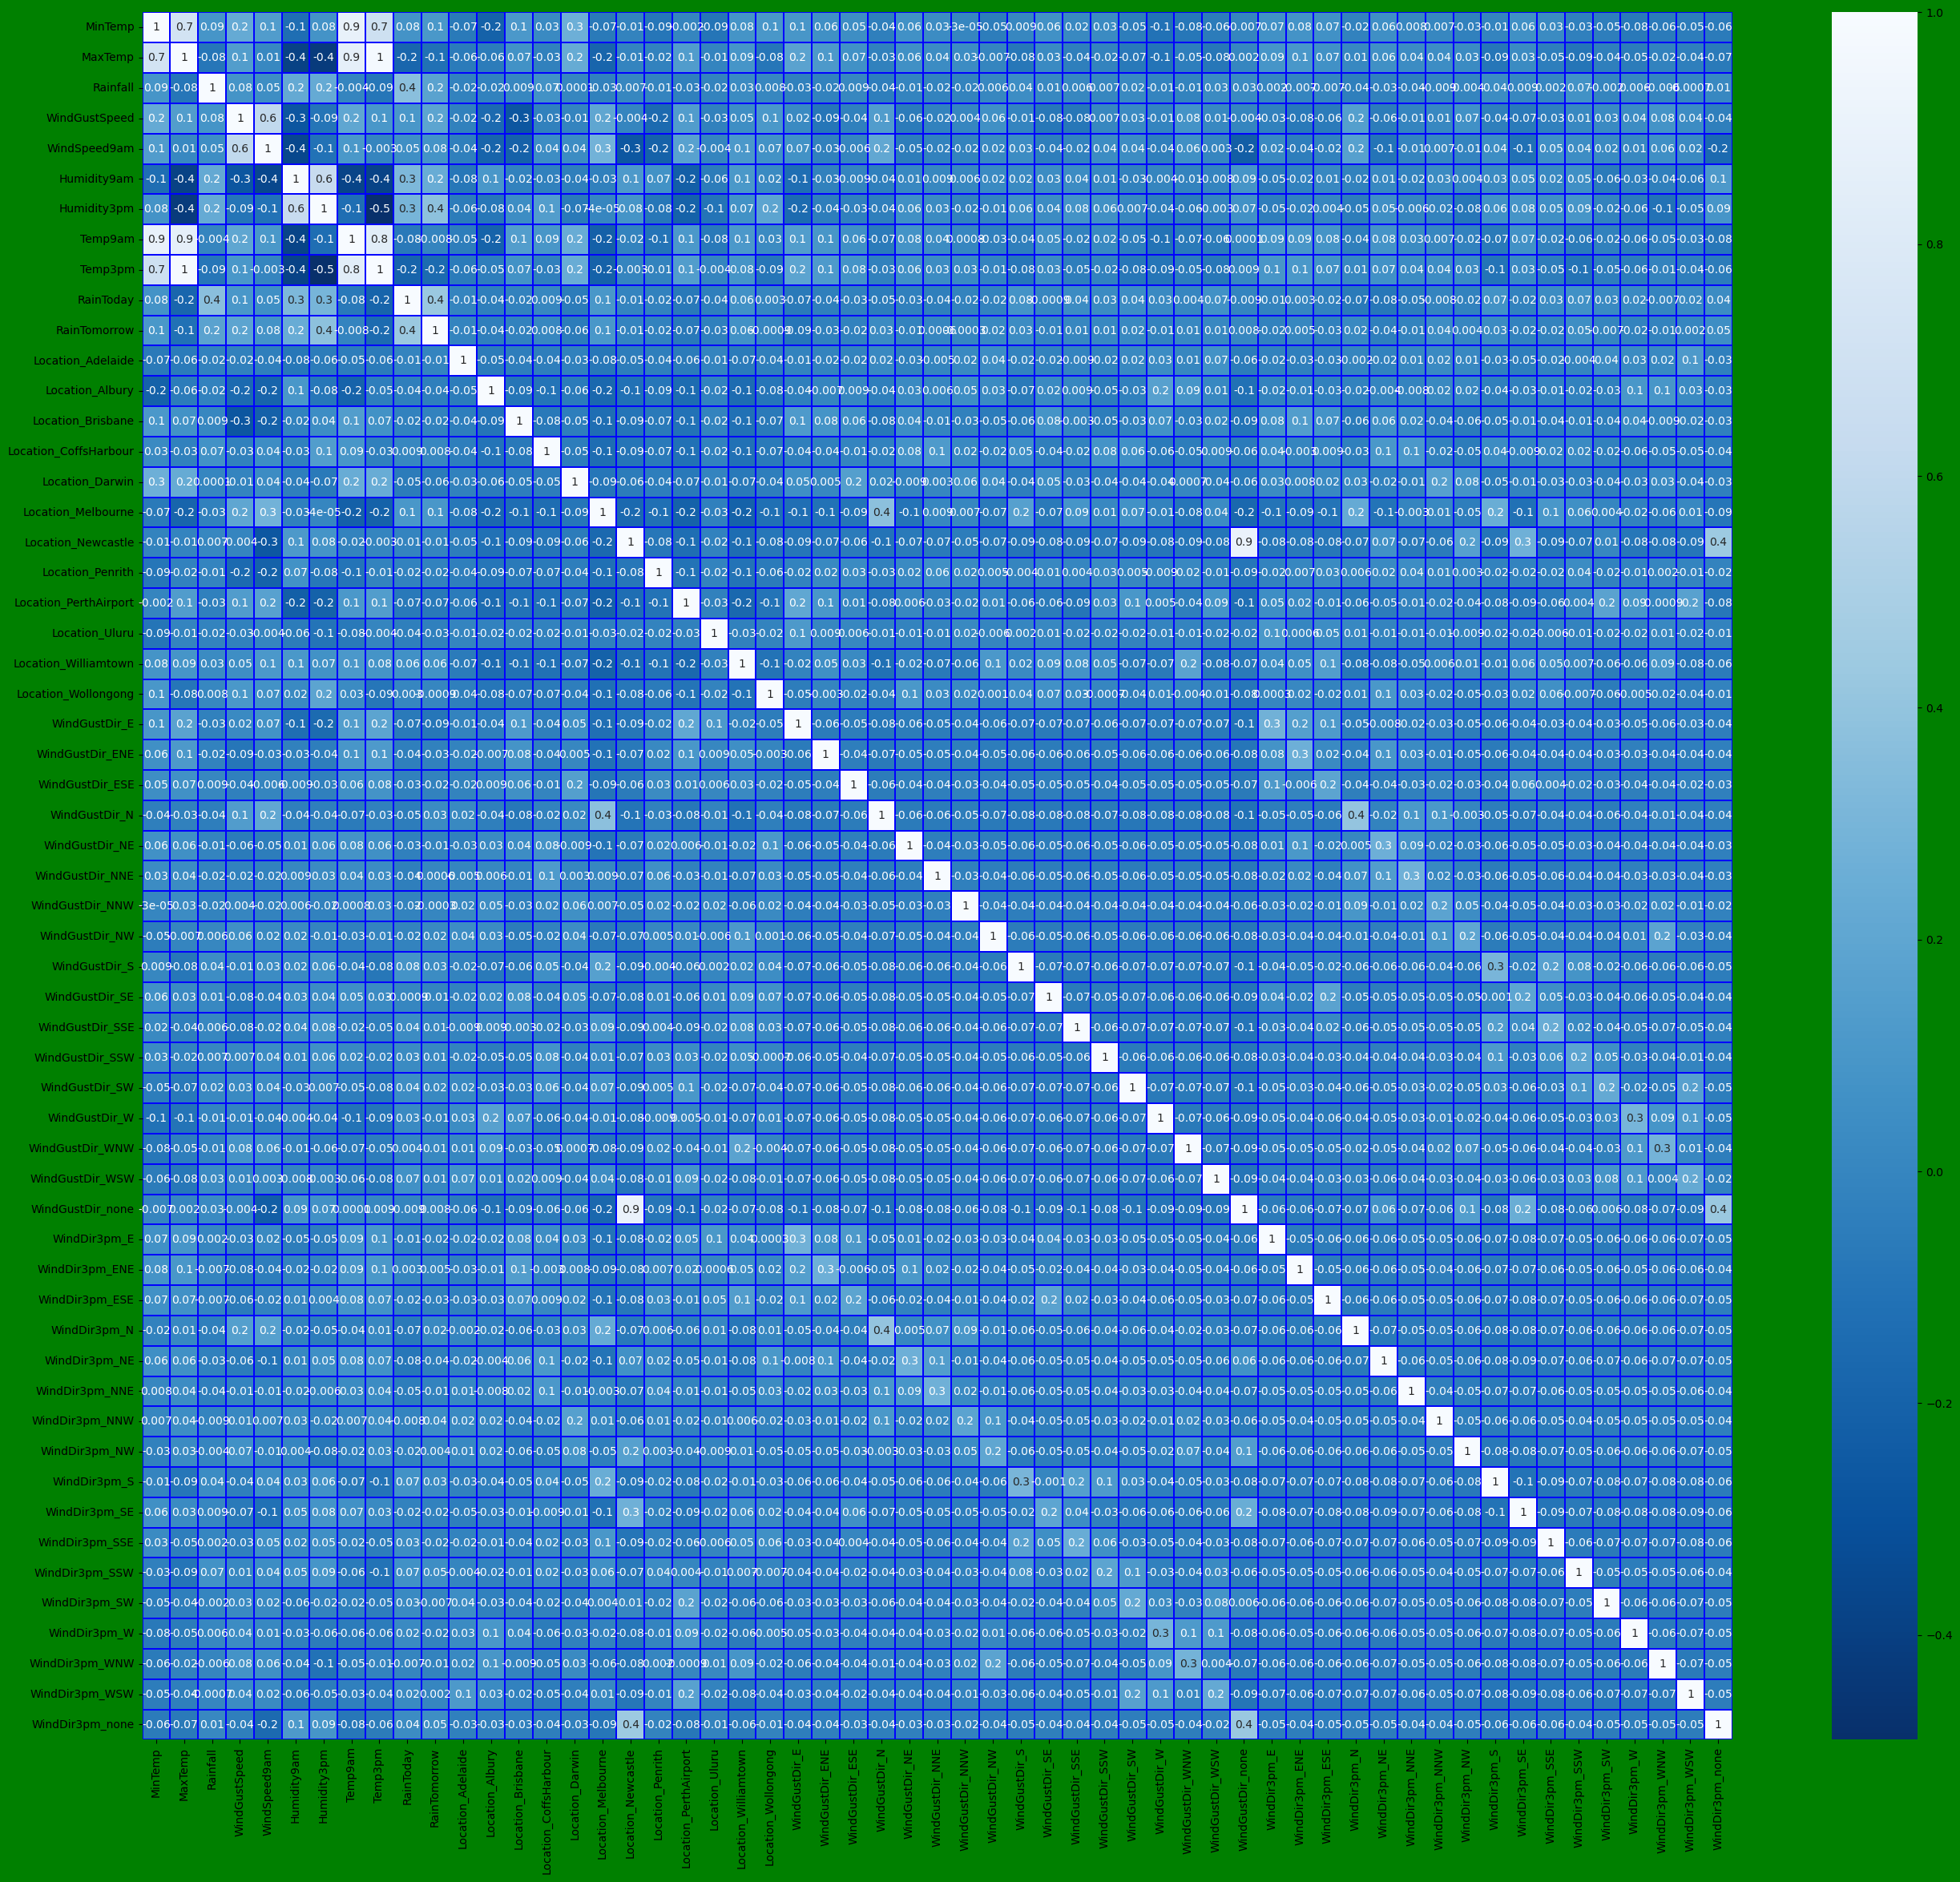

In [32]:
#we will use heatmap to check the multicollinearity
plt.figure(figsize=(32,28), facecolor='green')
sns.heatmap(data.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'b', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

from the above heatmap we can see that there is no multicollinearity issue found

In [33]:
data.skew() # there is skewness found in the data so we will try to remove it

MinTemp                  -0.082128
MaxTemp                   0.382103
Rainfall                 13.420570
WindGustSpeed             0.761451
WindSpeed9am              0.962761
Humidity9am              -0.255707
Humidity3pm               0.118776
Temp9am                  -0.016034
Temp3pm                   0.395397
RainToday                 1.521128
RainTomorrow              1.520255
Location_Adelaide         6.175442
Location_Albury           2.532151
Location_Brisbane         3.410115
Location_CoffsHarbour     3.297110
Location_Darwin           5.544504
Location_Melbourne        1.559966
Location_Newcastle        2.712956
Location_Penrith          3.813806
Location_PerthAirport     2.041011
Location_Uluru           14.598156
Location_Williamtown      2.005487
Location_Wollongong       3.852163
WindGustDir_E             3.492966
WindGustDir_ENE           4.166437
WindGustDir_ESE           4.994338
WindGustDir_N             2.985280
WindGustDir_NE            4.573624
WindGustDir_NNE     

In [34]:
#we will reduce the skewness through cube root method

data['Rainfall']=np.cbrt(data['Rainfall'])
data['Location_Adelaide']=np.cbrt(data['Location_Adelaide'])
data['Location_Darwin']=np.cbrt(data['Location_Darwin'])
data['Location_Uluru']=np.cbrt(data['Location_Uluru'])
data['WindGustDir_NNW']=np.cbrt(data['WindGustDir_NNW'])
data['WindGustDir_SSW']=np.cbrt(data['WindGustDir_SSW'])
data['WindDir3pm_SSW']=np.cbrt(data['WindDir3pm_SSW'])


In [35]:
data.skew() # reduced the skewness

MinTemp                  -0.082128
MaxTemp                   0.382103
Rainfall                  1.827354
WindGustSpeed             0.761451
WindSpeed9am              0.962761
Humidity9am              -0.255707
Humidity3pm               0.118776
Temp9am                  -0.016034
Temp3pm                   0.395397
RainToday                 1.521128
RainTomorrow              1.520255
Location_Adelaide         6.175442
Location_Albury           2.532151
Location_Brisbane         3.410115
Location_CoffsHarbour     3.297110
Location_Darwin           5.544504
Location_Melbourne        1.559966
Location_Newcastle        2.712956
Location_Penrith          3.813806
Location_PerthAirport     2.041011
Location_Uluru           14.598156
Location_Williamtown      2.005487
Location_Wollongong       3.852163
WindGustDir_E             3.492966
WindGustDir_ENE           4.166437
WindGustDir_ESE           4.994338
WindGustDir_N             2.985280
WindGustDir_NE            4.573624
WindGustDir_NNE     

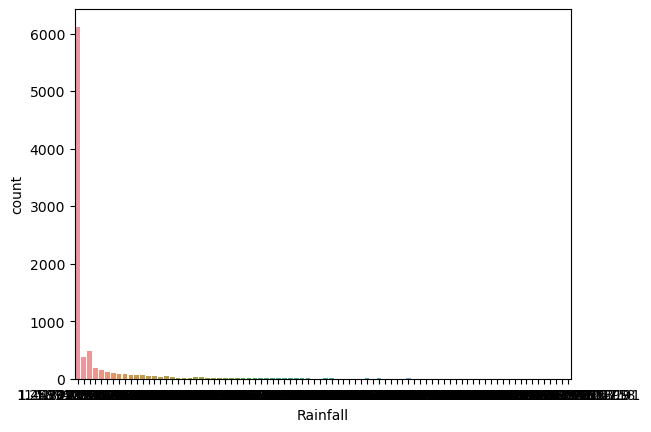

In [36]:
sns.countplot(x='Rainfall', data=data)
plt.show()


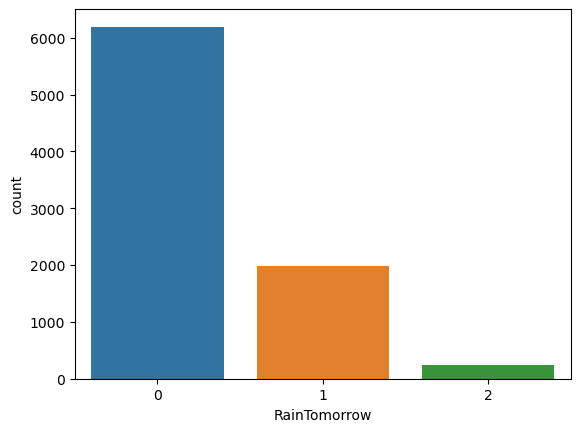

In [37]:
sns.countplot(x='RainTomorrow', data=data)
plt.show()         #there is less possibilities to rain tomorrow


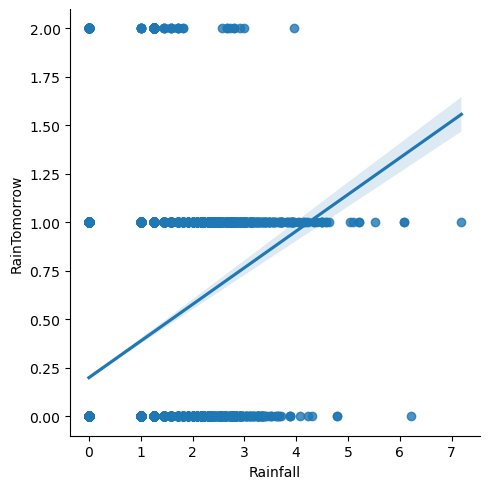

In [38]:
sns.lmplot(x='Rainfall',y='RainTomorrow',data=data,palette='colorblind')


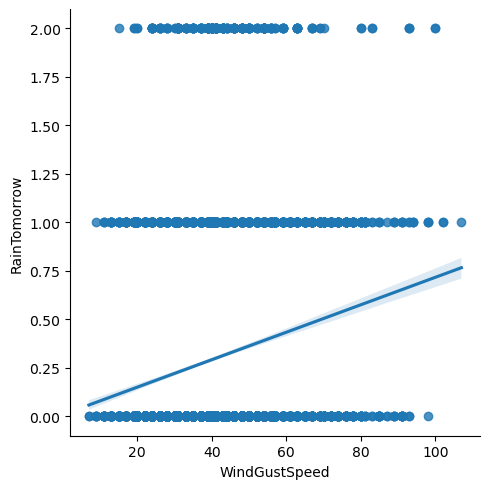

In [39]:
sns.lmplot(x='WindGustSpeed',y='RainTomorrow',data=data,palette='colorblind')




We will first predict RainTomorrow

In [40]:
X_raintmrw = data.drop(columns=['RainTomorrow', 'Rainfall'])
y_raintmrw = data['RainTomorrow']

#split the target and variable on the basis of raintomorrow

In [41]:
X_rainfall = data.drop(columns=['RainTomorrow', 'Rainfall'])
y_rainfall = data['Rainfall']
#split the target and variable on the basis of rainfall

In [42]:
scaler = StandardScaler()
x_scaled_raintmrw = scaler.fit_transform(X_raintmrw) # We are able to tackle the issue of biasness through standard scalar method
y_scaled_rainfall = scaler.fit_transform(X_rainfall)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [44]:
x_train_rt, x_test_rt, y_train_rt, y_test_rt = train_test_split(X_raintmrw,y_raintmrw, test_size = 0.30, random_state = 40)


In [45]:
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier


In [47]:
ET = ExtraTreesClassifier()
ET.fit(x_train_rt,y_train_rt)

ExtraTreesClassifier()

In [48]:
predET=ET.predict(x_test_rt)
print(accuracy_score(y_test_rt,predET))
print(confusion_matrix(y_test_rt,predET))
print(classification_report(y_test_rt,predET))


0.8761867088607594
[[1776   74    2]
 [ 212  385    6]
 [  16    3   54]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1852
           1       0.83      0.64      0.72       603
           2       0.87      0.74      0.80        73

    accuracy                           0.88      2528
   macro avg       0.86      0.78      0.81      2528
weighted avg       0.87      0.88      0.87      2528



From the above ExtraTreesClassifier model we have a very good accuracy score for the test data so overall we can say that it is a good model

In [49]:
RFC = RandomForestClassifier()
RFC.fit(x_train_rt,y_train_rt)


RandomForestClassifier()

In [50]:
predRFC=RFC.predict(x_test_rt)
print(accuracy_score(y_test_rt,predRFC))
print(confusion_matrix(y_test_rt,predRFC))
print(classification_report(y_test_rt,predRFC))

0.8769778481012658
[[1787   64    1]
 [ 220  380    3]
 [  20    3   50]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1852
           1       0.85      0.63      0.72       603
           2       0.93      0.68      0.79        73

    accuracy                           0.88      2528
   macro avg       0.89      0.76      0.81      2528
weighted avg       0.88      0.88      0.87      2528



In [51]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [52]:
from xgboost import XGBClassifier


In [53]:
XGB = XGBClassifier()
XGB.fit(x_train_rt,y_train_rt)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [54]:
XGB.score(x_train_rt,y_train_rt) #here is the score of train data

0.9869425131422758

In [55]:
predXGB=XGB.predict(x_test_rt)
print(accuracy_score(y_test_rt,predXGB))
print(confusion_matrix(y_test_rt,predXGB))
print(classification_report(y_test_rt,predXGB))

0.8738132911392406
[[1751   99    2]
 [ 195  403    5]
 [  13    5   55]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1852
           1       0.79      0.67      0.73       603
           2       0.89      0.75      0.81        73

    accuracy                           0.87      2528
   macro avg       0.86      0.79      0.82      2528
weighted avg       0.87      0.87      0.87      2528



In [56]:
import joblib
joblib.dump(RFC, 'Rainfall_forecast.pkl') #saving the model


['Rainfall_forecast.pkl']

In [57]:
RFC = joblib.load('Rainfall_forecast.pkl')

prediction = RFC.predict(x_test_rt)
prediction


array([0, 0, 2, ..., 0, 0, 0])

In [58]:
a = np.array(y_test_rt)
data = pd.DataFrame()
data['Predicted']=prediction #prediction for raintomorrow
data['Actual']=a              
data


,Predicted,Actual
0,0,0
1,0,0
2,2,2
3,0,0
4,0,0
...,...,...
2523,0,0
2524,0,0
2525,0,0
2526,0,0


Now this will be the prediction for rainfall

In [59]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(X_rainfall,y_rainfall, test_size = 0.30, random_state = 40)


In [60]:
regression = LinearRegression()
regression.fit(x_train_rf, y_train_rf)


LinearRegression()

In [61]:
regression.score(x_train_rf,y_train_rf) #here is the score of train data

0.7073793211784525

In [62]:
regression.score(x_test_rf,y_test_rf) #here is the score of train data

0.698497216681337

In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score


In [66]:
pred_LR = regression.predict(x_test_rf)
pred_train=regression.predict(x_train_rf)
print("r2_score:" , r2_score(y_test_rf,pred_LR))
print("r2_score on training data:" ,r2_score(y_train_rf,pred_train)*100 )
print("Mean absolute error:" ,mean_absolute_error(y_test_rf, pred_LR))
print("Mean squared erroe:" ,mean_squared_error(y_test_rf, pred_LR))
print("Root mean squared error:" ,np.sqrt(mean_squared_error(y_test_rf, pred_LR)))


r2_score: 0.698497216681337
r2_score on training data: 70.73793211784525
Mean absolute error: 0.2917230568983787
Mean squared erroe: 0.2516048872878467
Root mean squared error: 0.5016023198589165


In [67]:
RFR = RandomForestRegressor()
RFR.fit(x_train_rf, y_train_rf)


RandomForestRegressor()

In [68]:
pred_RFR = RFR.predict(x_test_rf)
pred_train=RFR.predict(x_train_rf)
print("Mean absolute error:" ,mean_absolute_error(y_test_rf, pred_RFR))
print("Mean squared error:" ,mean_squared_error(y_test_rf, pred_RFR))


Mean absolute error: 0.12993214322924146
Mean squared error: 0.10724303898193582


In [69]:
RFR.score(x_train_rf,y_train_rf) #here is the score of train data

0.9819592219287114

In [70]:
RFR.score(x_test_rf,y_test_rf) #here is the score of test data

0.871488685720107

In [71]:
import joblib
joblib.dump(RFR, 'Rainfall_forecast.pkl') #saving the model



['Rainfall_forecast.pkl']

In [72]:
RFR = joblib.load('Rainfall_forecast.pkl')

prediction = RFC.predict(x_test_rf)
prediction


array([0, 0, 2, ..., 0, 0, 0])

In [73]:
a = np.array(y_test_rf)
data = pd.DataFrame()
data['Predicted']=prediction
data['Actual']=a              #here is the prediction for rainfall
data


,Predicted,Actual
0,0,0.000000
1,0,0.000000
2,2,1.259921
3,0,0.000000
4,0,0.000000
...,...,...
2523,0,0.000000
2524,0,0.000000
2525,0,1.000000
2526,0,0.000000
